In [164]:
import os
import time
import sys
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.spatial import KDTree, cKDTree
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from concorde.tsp import TSPSolver
from math import sqrt, ceil, inf, floor

In [165]:
root_dir = os.getcwd()
tsp_dir = os.path.join(root_dir, "../tsplib")
concorde_dir = os.path.join(root_dir, "../pyconcorde/concorde")

In [166]:
sys.path.insert(0, root_dir)
sys.path.insert(0, tsp_dir)
#sys.path.insert(0, concorde_dir)

In [167]:
num_samples = 10000

In [168]:
def gen_tsp_data():
    ## Load a tsp library and Create a dictionary "tsp_database" of Name-X/Y coordinates.

    tsp_database = {}
    cities = os.listdir(tsp_dir)
    
    for city in cities:
        if city.endswith(".tsp"):
            with open(tsp_dir + '/' + city, 'r') as infile:
                lines = infile.readlines()
                for i in range(0, len(lines)):
                    line = lines[i]
                    if "DIMENSION" in line:
                        Dimension = line.strip().split(':')[1]
                        if not Dimension.isdigit():
                            continue
                    if "EDGE_WEIGHT_TYPE" in line:
                        EdgeWeightType = line.strip().split()[1]
                        if EdgeWeightType != "EUC_2D":
                            continue
                    if "NODE_COORD_SECTION" in line:
                        x_y = None
                        nodelist_x = []
                        nodelist_y = []
        
                        for j in range (1, int(Dimension)):
                            x_y = lines[i+1].strip().split()[1:]
    #                        print(x_y)
    #                        import pdb; pdb.set_trace()
                            x = x_y[0]
                            y = x_y[1]
                            nodelist_x.append(float(x))
                            nodelist_y.append(float(y))
                            i+=1
                        tsp_database.update({city[:-4]:[nodelist_x, nodelist_y]})
    return tsp_database    

In [169]:
tsp_database = gen_tsp_data()
problem_list = tsp_database.keys()
problem_list

dict_keys(['pla7397', 'pr107', 'pla85900', 'usa13509', 'brd14051', 'pla33810', 'pr152', 'pr226', 'pr1002', 'rl11849', 'rat575', 'kroA100', 'eil101'])

Problem : pr1002


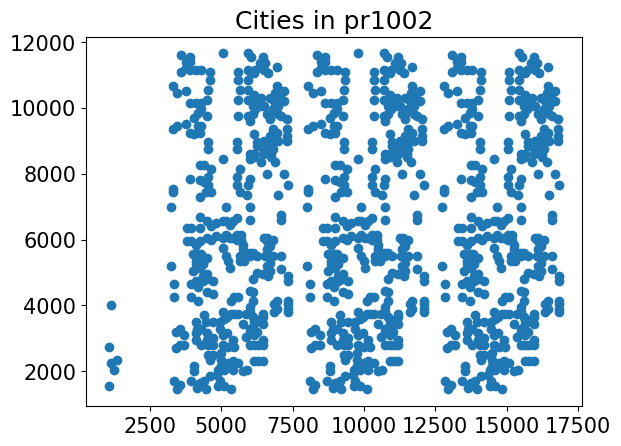

In [170]:
import pyproj as p
#x = "kroA100"
#x = "rat575"
#x = "eil101"
#x = "pr107"
#x = "pr152"
x = "pr1002"
coord_geo = False
if coord_geo == True:
     crs_wgs = p.Proj(init='epsg:4326')
     crs_bng = p.Proj(init = 'epsg:27700')
    
     tsp_database[x][0],tsp_database[x][1]  = p.transform(crs_wgs, crs_bng, tsp_database[x][1], tsp_database[x][0])
# for x in tsp_database:
print("Problem : " + x)
#    print(tsp_database[x])
X_coord = np.array(tsp_database[x][0])
Y_coord = np.array(tsp_database[x][1])
X_Y = np.array(list(zip(X_coord,Y_coord))).reshape(len(X_coord),2)
plt.plot()
plt.title('Cities in ' + x)
plt.scatter(X_coord, Y_coord)
plt.show()


lt.plot()<br>
lt.title('Cities in ' + x)<br>
lt.scatter(X_coord, Y_coord)<br>
lt.show()

In [171]:
from numpy import inf

X_Y[X_Y == inf] = 0


In [172]:
def get_clustered_cities(num_clust, labels_array):
    return np.where(labels_array == num_clust)

In [173]:
def plot_sys2_cities(sys2_cities):
    for k in K:
        plt.scatter(sys2_cities[k][:,0], sys2_cities[k][:,1])
        plt.show()

In [113]:
MAC_ising = True
n_problems = 8
#cluster_size_min = floor(n_problems*0.7)
cluster_size_min = 3
#cluster_size_max = floor(1.5*n_problems)
cluster_size_max = 12
print("The minimum size of clusters: ", cluster_size_min)
print("The maximum size of clusters: ", cluster_size_max)
n_clusters = []
n_clusters.append(ceil(len(X_coord)/n_problems))
while n_clusters[-1] > n_problems:
    n_clusters.append(ceil(n_clusters[-1]/n_problems))
n_hierarchies = len(n_clusters)
print(n_clusters)

The minimum size of clusters:  3
The maximum size of clusters:  12
[126, 16, 2]


time = 9.2357 seconds


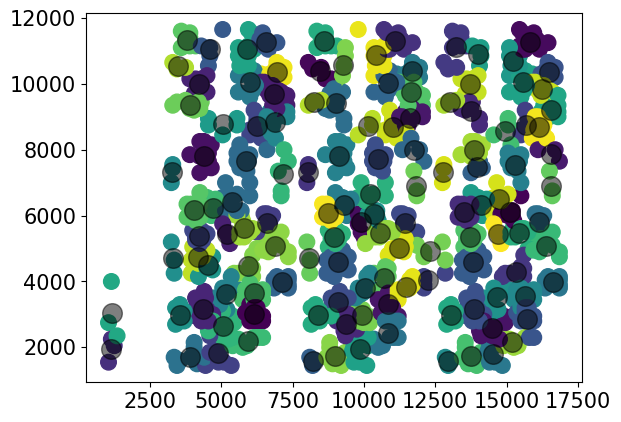

time = 0.1417 seconds


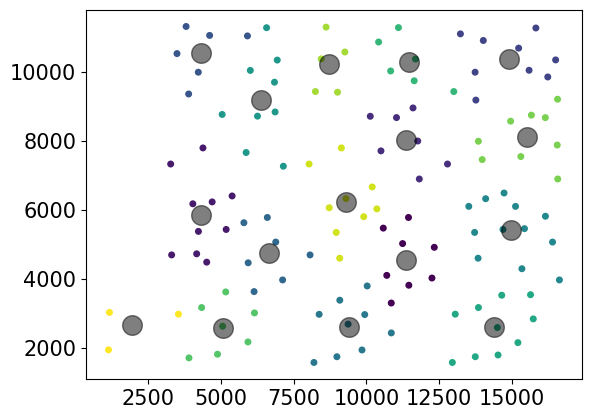

time = 0.0149 seconds


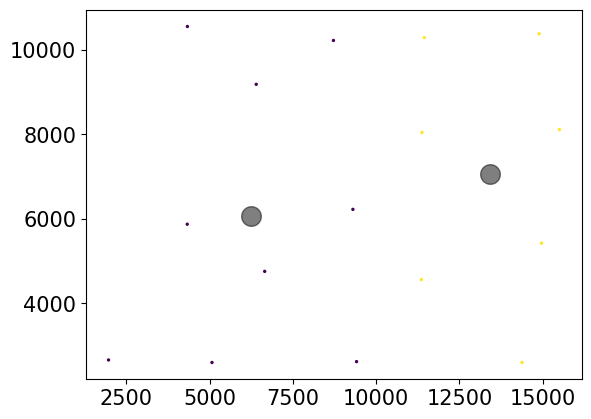

'\nfor i in range(len(X_Y)):\n    print(i)\n    print(X_Y[i].shape)\n'

In [102]:
import time   
from k_means_constrained import KMeansConstrained

X_Y=[X_Y]
KM_labels = []

Constrained_KMeans = True

if Constrained_KMeans:
    for i in range(n_hierarchies):
        #print(i, n_clusters[i])
        tic = time.perf_counter()
        KMC = KMeansConstrained(
            n_clusters = n_clusters[i],
            size_min = cluster_size_min,
            size_max = cluster_size_max,
            random_state = 0)
        y_KMC = KMC.fit_predict(X_Y[i])
        centers = KMC.cluster_centers_
        toc = time.perf_counter()
        print(f"time = {toc-tic:0.4f} seconds")
        plt.scatter(X_Y[i][:,0], X_Y[i][:,1], c=y_KMC, s=n_clusters[i], cmap='viridis')
        KM_labels.append(y_KMC)
        X_Y.append(centers)
        plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
        plt.rcParams.update({'font.size':15})
        plt.show()
else :
    for i in range(n_hierarchies):
        tic = time.perf_counter()
        kmeanModel = KMeans(n_clusters[i], init='k-means++').fit(X_Y[i])
        toc = time.perf_counter()
        print(f"time = {toc-tic:0.4f} seconds")
        kmeanModel.fit(X_Y[i])
        y_kmeans = kmeanModel.predict(X_Y[i])
        plt.scatter(X_Y[i][:,0], X_Y[i][:,1], c=y_kmeans, s=50, cmap='viridis')
        centers = kmeanModel.cluster_centers_
        #print(kmeanModel.cluster_centers_)
        #print(kmeanModel.labels_)
        KM_labels.append(kmeanModel.labels_)
        X_Y.append(centers)
        plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
        plt.rcParams.update({'font.size':15})
        plt.show()

    for i in range(len(X_Y)):
        print(i)
        print(X_Y[i].shape)
"""
for i in range(len(X_Y)):
    print(i)
    print(X_Y[i].shape)
"""        

In [103]:
## sys2_cities has [hierarchies where the sub-cluster belongs, Center X/Y coordinates of the sub-cluster, Cities X/Y coordinates in the sub-cluster]
## sys2_centers has [hierarchies where the sub-cluster belongs, Center X/Y coordinates of the sub-cluster]
## sys2_clusters has [hierarchies where the sub-cluster belongs, Cities X/Y coordinates in the sub-cluster]
sys2_centers = []
sys2_clusters = []

H = range(0,n_hierarchies)
for h in H:
    K = range(0,n_clusters[h])
    sys2_centers.append([])
    sys2_clusters.append([])
    colors = mpl.cm.tab20(range(20))
    for k in K:
        sys2_centers[h].append(X_Y[h+1][k])
        sys2_clusters[h].append(X_Y[h][get_clustered_cities(k, KM_labels[h])])
    largest_cluster_size = n_problems
    smallest_cluster_size = n_problems
    for k in K:
        if len(sys2_clusters[h][k]) > largest_cluster_size:
            largest_cluster_size = len(sys2_clusters[h][k])
        if len(sys2_clusters[h][k]) < smallest_cluster_size:
            smallest_cluster_size = len(sys2_clusters[h][k])
        if (len(sys2_clusters[h][k]) == 1):
            print("dirty cluster")
    print("The largest & smallest cluster size in Hierarchy ",h+1, ": ", largest_cluster_size, " & ", smallest_cluster_size)
## Add the topmost cluster
sys2_centers.append([])
sys2_clusters.append([])
sys2_centers[-1].append([0, 0])
sys2_clusters[-1].append(X_Y[-1])

The largest & smallest cluster size in Hierarchy  1 :  12  &  3
The largest & smallest cluster size in Hierarchy  2 :  12  &  3
The largest & smallest cluster size in Hierarchy  3 :  9  &  7


In [104]:
def Fix_first_last_cities(sys2_centers, sys2_clusters, sol_route, Lowest_Hier):
    ## Find a pair of the closest cities that are in different clusters which will be sequentially visited.
    ## After finding, place each city in the pair in the end of the preceding cluster and the start of the following cluster.
    ## To avoid the city in the following cluster to be selected once again for the next search, the next search starts from Index 1.
    ## Refer to Page 25
    tree = cKDTree(sys2_centers)
    clust_id_list = []
    total_traveling_distance = 0
    
    for k in range(len(sol_route)-1):
        ## Finding a pair of cities from distinct sub-clusters having the shortest distance betweeen sub-clusters.
        #print("k+1: ", k+1, " sol_route: ", sol_route[k+1])
        clust_idx_curr = tree.query(sol_route[k])[1]
        clust_idx_next = tree.query(sol_route[k+1])[1]
        if k ==0:
            clust_id_list.append(clust_idx_curr)
        clust_id_list.append(clust_idx_next)
        
        curr_clust = sys2_clusters[clust_idx_curr]
        next_clust = sys2_clusters[clust_idx_next]
        tree_clust = cKDTree(next_clust)
        if k ==0:
            search_init = 0
        else:
            search_init = 1
        sht_dist = inf
        for inc in range(search_init, len(curr_clust)):
            val_sd, idx_sd = tree_clust.query(curr_clust[inc])
            if val_sd < sht_dist:
                sht_dist = val_sd
                sht_idx_curr = inc
                sht_idx_next = idx_sd
                
        ## Fix the first and the last cities according to the information found above.
        curr_clust[[-1, sht_idx_curr]] = curr_clust[[sht_idx_curr,-1]]
        sys2_clusters[clust_idx_curr] = curr_clust
        next_clust[[0, sht_idx_next]] = next_clust[[sht_idx_next,0]]
        sys2_clusters[clust_idx_next] = next_clust
        if Lowest_Hier:
            total_traveling_distance += sht_dist
            #print("Inter-cluster distance (clusters ", k, "-", k+1, "): ", sht_dist, " total distance: ", total_traveling_distance)
            
    return sys2_clusters, clust_id_list, total_traveling_distance

In [105]:
def skip_ising(Lowest_Hier, total_traveling_distance, sol_route, route_btw_clusters, timet, nMAC_array, nRandFlip_array, curr_clust_size, infile, outfile):
    print("Ising skipped!!")
    timet[-1].append(0)
    nMAC_array[-1].append(0)
    nRandFlip_array[-1].append(0)
    DIST = 0
    with open(infile,"r") as inF:
        lines = inF.readlines()
        outF = open(outfile,"w")
        #outF.write(str(curr_clust_size))
        #outF.write("\n")
        
        for i in range(1, curr_clust_size+1):
            line = lines[i]
            outF.write(line)
                        
            curr = line.strip().split()
            for j in range(len(curr)):
                curr[j] = float(curr[j])
            sol_route.append(curr)
            
            if Lowest_Hier:
                if (i == 0) or (i == curr_clust_size-1):
                    route_btw_clusters.append(curr)
        #if Lowest_Hier:
        for i in range(1, curr_clust_size):
            X1 = float(lines[i].strip().split()[0])
            Y1 = float(lines[i].strip().split()[1])
            X2 = float(lines[i+1].strip().split()[0])
            Y2 = float(lines[i+1].strip().split()[1])
            DIST += sqrt((X1-X2)**2+(Y1-Y2)**2)
        outF.write("\n")
        outF.write("dist ")
        outF.write(str(DIST))
        outF.write("\n")
        outF.write("n_MAC 0")
        outF.write("\n")
        outF.write("n_RandFlip 0")
        outF.write("\n")
        
        outF.close()
        inF.close()

        if Lowest_Hier:
            total_traveling_distance += DIST
    
    return total_traveling_distance, sol_route, route_btw_clusters, timet, nMAC_array, nRandFlip_array

In [106]:
def gen_sys2_sol(MAC_ising, benchmark, sys2_centers, sys2_clusters, SchPar):
    MAC_ising = True
    if MAC_ising:
        cpp_cmd = "./ising_mac"
    else :
        cpp_cmd = "./ising_RNG"
    os.system("rm -rf sys2clusters_" + str(benchmark))
    SYS2_CENTERS = sys2_centers
    SYS2_CLUSTERS = sys2_clusters
    
    timet =[]
    nMAC_array =[]
    nRandFlip_array = []
    sys2_labels = []
    colors = mpl.cm.tab20(range(20))
    
    for h in range(0, n_hierarchies+1):
        print("Execute Ising Solver for Hierarchy ", n_hierarchies-h)
        sys2_centers = SYS2_CENTERS[n_hierarchies-h]
        sys2_clusters = SYS2_CLUSTERS[n_hierarchies-h]

        if h != 0:
            sys2_clusters, clust_id_list, total_traveling_distance = Fix_first_last_cities(sys2_centers, sys2_clusters, sol_route, h == n_hierarchies)
        else:
            clust_id_list = range(0, len(sys2_centers))
            
        sol_route = []
        route_btw_clusters = []
        timet.append([])
        nMAC_array.append([])
        nRandFlip_array.append([])
        #kth = 0
        sys2_labels.append([])
        #for k in range(0, len(sys2_centers)):
        #for k in clust_id_list:
        for k in range(len(clust_id_list)):
            curr_center = sys2_centers[clust_id_list[k]]
            curr_clust = sys2_clusters[clust_id_list[k]]
            curr_clust_size = len(curr_clust)
            for l in range(curr_clust_size):
                sys2_labels[h].append(colors[k%20])
            curr_clust_file = [curr_clust_size]
            curr_clust_file.append(curr_clust)
            os.system("mkdir -p sys2clusters_" + str(benchmark))
            curr_filename = str(benchmark) + "_h" + str(n_hierarchies-h)  + "_c" + str(k) +".in"
            curr_logfile = str(benchmark) + "_h" + str(n_hierarchies-h)   + "_c" + str(k) +".out"
            inF = open("sys2clusters_" + str(benchmark) + "/" + curr_filename,"w")
            inF.write(str(curr_clust_size))
            inF.write("\n")
            for i in curr_clust:
                inF.write(str(i[0]) + " " + str(i[1]))
                inF.write("\n")
            inF.close()
            
            for i in range(0,1):
                if h == 0:
                    if curr_clust_size == 2:
                        total_traveling_distance, sol_route, route_btw_clusters, timet, nMAC_array, nRandFlip_array = skip_ising(h == n_hierarchies, 0, sol_route, route_btw_clusters, timet, nMAC_array, nRandFlip_array, curr_clust_size, "sys2clusters_" + str(benchmark) + "/" + curr_filename, "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                        break                        
                else:
                    if k == 0 or k == len(clust_id_list)-1:
                        if curr_clust_size < 3:
                            total_traveling_distance, sol_route, route_btw_clusters, timet, nMAC_array, nRandFlip_array = skip_ising(h == n_hierarchies, total_traveling_distance, sol_route, route_btw_clusters, timet, nMAC_array, nRandFlip_array, curr_clust_size, "sys2clusters_" + str(benchmark) + "/" + curr_filename, "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                            break
                    else:
                        if curr_clust_size < 4:
                            total_traveling_distance, sol_route, route_btw_clusters, timet, nMAC_array, nRandFlip_array = skip_ising(h == n_hierarchies, total_traveling_distance, sol_route, route_btw_clusters, timet, nMAC_array, nRandFlip_array, curr_clust_size, "sys2clusters_" + str(benchmark) + "/" + curr_filename, "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                            break
                tic = time.perf_counter()
                ### when h>0, Problem_size to optimize = N-1 when k is 0 or -1, otherwise N-2
                if h == 0 :
                        os.system(cpp_cmd+" -I "+str(SchPar[0])+" -c "+str(SchPar[1])+" -F "+str(SchPar[2])+" -D "+str(SchPar[3])+" -P "+str(SchPar[4])+" k0" + " sys2clusters_" + str(benchmark) + "/" + curr_filename + " >> " + "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                elif k == len(clust_id_list)-1:
                    os.system(cpp_cmd+" -I "+str(SchPar[0])+" -c "+str(SchPar[1])+" -F "+str(SchPar[2])+" -D "+str(SchPar[3])+" -P "+str(SchPar[4])+" k-1" + " sys2clusters_" + str(benchmark) + "/" + curr_filename + " >> " + "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                else :
                    os.system(cpp_cmd+" -I "+str(SchPar[0])+" -c "+str(SchPar[1])+" -F "+str(SchPar[2])+" -D "+str(SchPar[3])+" -P "+str(SchPar[4])+" k" + str(k+1) + " sys2clusters_" + str(benchmark) + "/" + curr_filename + " >> " + "sys2clusters_" + str(benchmark) + "/" + curr_logfile)
                toc = time.perf_counter()
                timet[-1].append(toc-tic)
                
                dist_array =[]
                with open("sys2clusters_" + str(benchmark) + "/" + curr_logfile,"r") as outFile:
                    lines = outFile.readlines()
                    for i in range(0,len(lines)):
                        line = lines[i]
                        if "dist" in line:
                            dist_array.append(line.strip().split()[1])
                            continue
                        if "n_MAC" in line:
                            nMAC_array[-1].append(int(line.strip().split()[1]))
                            continue
                        if "n_RandFlip" in line:
                            nRandFlip_array[-1].append(int(line.strip().split()[1]))
                            continue
                    dist = min(dist_array)
                    ####################################
                    ####################################
                    if h == n_hierarchies:
                        total_traveling_distance += float(dist)
                        print("hierarchy: ", h, " cluster: ", k, " distance to the next cluster: ", float(dist), " total distance: ", total_traveling_distance)
                    ####################################
                    ####################################
                    for i in range(0, curr_clust_size):
                        line = lines[i]
                        """
                        if "seq_clust" in line:
                            continue
                        if "dist" in line:
                            continue
                        if "size():" in line:
                            continue
                        if "final" in line:
                            continue
                        if "remapped" in line:
                            continue
                        """
                        curr = line.strip().split()
                        for j in range(len(curr)):
                            curr[j] = float(curr[j])
                        sol_route.append(curr)
                    
                        if h == n_hierarchies:
                            if (i == 0) or (i == curr_clust_size-1):
                                route_btw_clusters.append(curr)
                    
                    outFile.close()
                print("done with cluster" + str(k))
        print(f"Ising Max time = {max(timet[-1]):0.4f} seconds", " / ", str(min(timet[-1])))
        if MAC_ising:
            print(f"Max/Min number of Ising Macro MAC Operations = ", max(nMAC_array[-1]), " / ", min(nMAC_array[-1]))
            print(f"Max/Min number of Ising Macro RandomFlip Operations = ", max(nRandFlip_array[-1]), " / ", min(nRandFlip_array[-1]))
    
    print("total_traveling_distance: ", total_traveling_distance)
    return sol_route, route_btw_clusters, sys2_labels, total_traveling_distance, nMAC_array, nRandFlip_array

In [107]:
print(n_clusters)
#sol_route, route_btw_clusters, sys2_labels = gen_sys2_sol(MAC_ising, x, sys2_centers, sys2_clusters)
init_Irands = [50]
init_cools = [0.001]
Factors = [0.9]
Thresholds = [0]
Patiences = [10000]
#cools = [0.01, 0.005, 0.002, 0.001]
#Factors = [0.8, 0.9, 0.95, 0.99, 0.995, 0.999]
#Thresholds = [1e6, 1e3, 0, -1e3, -1e6]
#Patiences = [5, 10, 20, 50]
ttds = []
nMACs = []
nRandFlips = []

for Irand in init_Irands:
    for cool in init_cools:
        for Factor in Factors:
            for Threshold in Thresholds:
                for Patience in Patiences:
                    scheduler_params = [Irand, cool, Factor, Threshold, Patience]
                    sol_route, route_btw_clusters, sys2_labels, ttd, nMAC, nRandFlip = gen_sys2_sol(MAC_ising, x, sys2_centers, sys2_clusters, scheduler_params)
                    ttds.append(ttd)
                    nMACs.append(max(nMAC[-1]))
                    nRandFlips.append(max(nRandFlip[-1]))
i = 0
for Irand in init_Irands:
    for cool in init_cools:
        for Factor in Factors:
            for Threshold in Thresholds:
                for Patience in Patiences:
                    print("Irand: ", Irand, "Cool: ", cool, "Factor: ", Factor, " Threshold: ", Threshold, " Patience: ", Patience, " ttd: ", ttds[i], " nMAC: ", nMACs[i], " nRandFlip: ", nRandFlips[i])
                    i += 1

[126, 16, 2]
Execute Ising Solver for Hierarchy  3
Ising skipped!!
Ising Max time = 0.0000 seconds  /  0
Max/Min number of Ising Macro MAC Operations =  0  /  0
Max/Min number of Ising Macro RandomFlip Operations =  0  /  0
Execute Ising Solver for Hierarchy  2
done with cluster0
done with cluster1
Ising Max time = 1.3800 seconds  /  0.5218588509596884
Max/Min number of Ising Macro MAC Operations =  27188  /  16230
Max/Min number of Ising Macro RandomFlip Operations =  3884  /  3246
Execute Ising Solver for Hierarchy  1
done with cluster0
done with cluster1
done with cluster2
Ising skipped!!
done with cluster4
done with cluster5
done with cluster6
done with cluster7
done with cluster8
done with cluster9
done with cluster10
done with cluster11
done with cluster12
done with cluster13
done with cluster14
done with cluster15
Ising Max time = 3.0752 seconds  /  0
Max/Min number of Ising Macro MAC Operations =  37764  /  0
Max/Min number of Ising Macro RandomFlip Operations =  4196  /  0
Exe

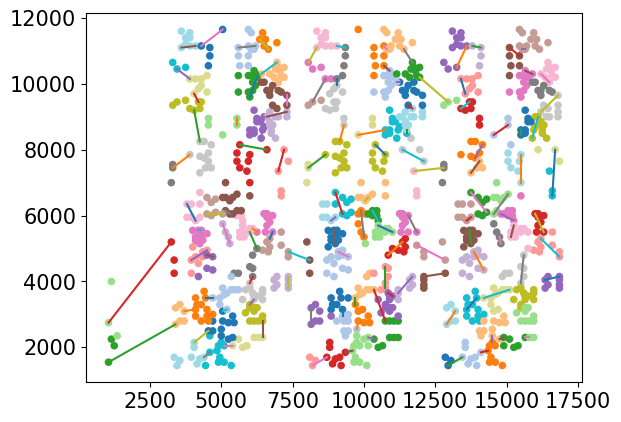

In [108]:
route = np.array(route_btw_clusters)
sol_route = np.array(sol_route)
for n in range(int(len(route_btw_clusters)/2)-1):
    plt.plot(route[2*n+1:2*(n+1)+1,0], route[2*n+1:2*(n+1)+1,1], '-')
plt.scatter(sol_route[:,0], sol_route[:,1], c=sys2_labels[n_hierarchies][:], s=20)
plt.show()

In [109]:
from math import sin, cos, sqrt, atan2, radians
def compute_geo(p1,p2):
    R = 6373.0
    
    lat1 = radians(float(p1[0]))
    lon1 = radians(float(p1[1]))
    lat2 = radians(float(p2[0]))
    lon2 = radians(float(p2[1]))
    
    dlon = lon2 - lon1
    dlat = lat2 -lat1

    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a),sqrt(1-a))
    dist = R*c
    return dist

In [110]:
coord_geo == False
if coord_geo == True:
#     test = np.load("sys2clusters_" + str(x) + "/sol_table.npy", allow_pickle=True)
    for i in range(len(test)):
        print(i)
        for j in range(len(test[i])):
            geo_dist = 0
            li = test[i][j][1]
            for idx,elem in enumerate(li):
                thiscity = elem
                nextcity = li[(idx+1)%len(li)]
                geo_dist += compute_geo(thiscity, nextcity)
            test[i][j][2] = geo_dist 
            print(geo_dist)
        np.save("sys2clusters_" + str(x) + "/sol_table" ,test)    


mport pdb; pdb.set_trace()     

In [111]:
## Sangmin edited

print(X_coord.shape)
print(Y_coord.shape)
print(x)
with open("tsp" + x + "_pyconcorde.txt", "w") as f:
    solver = TSPSolver.from_data(X_coord, Y_coord, norm="EUC_2D")  
    solution = solver.solve()
    f.write( str(" ") + str('output') + str(" ") )
    f.write( str("solution found? ") + str(solution.found_tour) + str(" ") )
    f.write( str("Optimal value? ") + str(solution.optimal_value) + str(" ") )
    f.write( str(" ").join( str(node_idx+1) for node_idx in solution.tour) )
    f.write( str(" ") + str(solution.tour[0]+1) + str(" ") )

(1001,)
(1001,)
pr1002
Problem Name: d01718c0f9a94933b65b2421028a6334
Problem Type: TSP
Number of Nodes: 1001
Rounded Euclidean Norm (CC_EUCLIDEAN)
CCtsp_solve_dat ...
Finding a good tour for compression ...
linkern ...
Starting Cycle: 304860
   0 Steps   Best: 263521   0.00 seconds
   2 Steps   Best: 263455   0.01 seconds
   3 Steps   Best: 263423   0.01 seconds
   6 Steps   Best: 262935   0.01 seconds
   7 Steps   Best: 262928   0.01 seconds
  10 Steps   Best: 262839   0.01 seconds
  11 Steps   Best: 262622   0.01 seconds
  13 Steps   Best: 262548   0.01 seconds
  14 Steps   Best: 262418   0.01 seconds
  15 Steps   Best: 262373   0.01 seconds
  17 Steps   Best: 261715   0.01 seconds
  19 Steps   Best: 261708   0.01 seconds
  20 Steps   Best: 261685   0.01 seconds
  24 Steps   Best: 261106   0.01 seconds
  29 Steps   Best: 260695   0.01 seconds
  34 Steps   Best: 260651   0.02 seconds
  39 Steps   Best: 260642   0.02 seconds
  43 Steps   Best: 260437   0.02 seconds
  46 Steps   Best: 

In [112]:
GO = False
if GO:
    num_samples = 10000
    set_nodes_coord = np.random.random([num_samples, n_clusters, 2])
    with open("tsp" + str(n_clusters) + "_pr1002.txt", "w") as f:
        solver = TSPSolver.from_data(centers[:,0], centers[:,1], norm="EUC_2D")  
        solution = solver.solve()
        f.write( " ".join( str(x)+str(" ")+str(y) for x,y in centers) )
        f.write( str(" ") + str('output') + str(" ") )
        f.write( str(" ").join( str(node_idx+1) for node_idx in solution.tour) )
        f.write( str(" ") + str(solution.tour[0]+1) + str(" ") )
        